<a href="https://colab.research.google.com/github/JakubNajman/CORA_Analysis/blob/main/ONS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projekt na zaliczenie przedmiotu ONS - Analiza zbioru CORA. Jakub Najman
Poniższy zeszyt programu Jupyter zawiera analizę zbioru danych CORA. Zbiór CORA to zbiór danych dotyczący 2708 prac naukowych z zakresu sztucznej inteligencji podzielonych na 7 kategorii. Poniższy zeszyt zawiera analizę sieci powiązań, analizę wezłów sieci, analizę podstawowych wartości grafu, który jest stworzony przez sieć oraz na samym końcu bardzo prostą sieć neuronową GNN - Graph Neural Network korzystającą z biblioteki Stellar Graph.

## 1. Analiza zbioru danych oraz wskazanie podstawowych wartości.
Poniższe komórki zawierają analizę zbioru danych w tym prezentację danych jako grafu powiązań, wskazanie podstawowych wartości tego grafu takich jak: liczb węzłów, skierowanie grafu, średni stopień węzła oraz 10 węzłów z największym stopniem (outlierów).

In [1]:
!pip install torch-geometric

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 4.8 MB/s eta 0:00:00


In [2]:
#Importowanie niezbędnych bibliotek takich jak torch i torch_geometrics, które posiadają w swoich klasach zbiór danych CORA.
import os

import torch
import torch_geometric
from torch_geometric.utils import to_networkx
from torch_geometric.datasets import Planetoid

data = '/content/drive/MyDrive/ONS'

In [3]:
#Utworzenie obiektu klasy Planetoid wraz z miejscem zapisu danych na podłączonym dysku Google Drive. Klasa Planetoid to klasa biblioteki torch_geomentrics enkapsulująca zbiór danych CORA i inne zbiory danych.
dataset = Planetoid(root=data, name='Cora')
data = dataset[0]

##1.1 Podstawowe wartości grafu
Poniżej zostały przedstawione wartości grafu:
- liczba węzłów informuje nas liczności wężłów w grafie,
- liczba krawędzi informuje nas o unikalnych połączeniach między węzłami,
- skierowanie grafu opisuje nam relacyjność między połączeniami, w naszym przypadku graf nie jest skierowany więc nie istnieje relacyjność między połączeniami węzłów,
- średni stopień węzła w grafie informuje nas o tym ile średnio połączeń ma każdy węzeł - dla zbioru danych CORA to prawie 4 połączenia na węzeł.

W przypadku klasy Planetoid jesteśmy w stanie skorzystać z wbudowanych metod tej klasy do wskazania tych wartości.

In [4]:
print(f'Liczba węzłów: {data.num_nodes}, liczba krawędzi: {data.num_edges}, czy skierowany: {data.is_directed()}')

Liczba węzłów: 2708, liczba krawędzi: 10556, czy skierowany: False


In [5]:
print(f'Średni stopień węzła degv: {data.num_edges / data.num_nodes}')

Średni stopień węzła degv: 3.8980797636632203


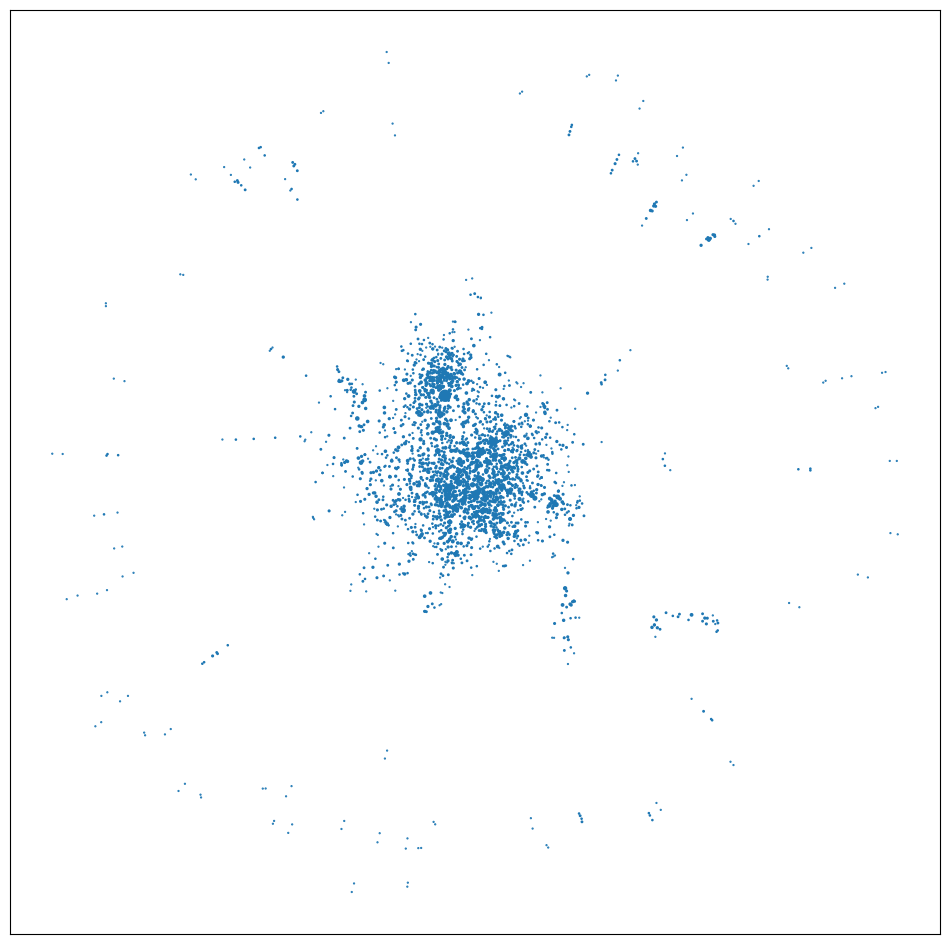

In [15]:
# Poniższa komórka zawiera importowanie bibliotek obliczeniowych numpy, rysunkowych matplotlib i biblioteki networx do tworzenia obrazów grafów i wykonywania operacji na grafach.
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

#Konwersja danych z klasy Planetoid do klasy Graph biblioteki networx.
G = to_networkx(data)
#Obliczenie wielkości węzła na podstawie jego stopnia degv.
cent = nx.degree_centrality(G)
node_size = list(map(lambda x: x * 500, cent.values()))
pos = nx.spring_layout(G, seed=42)
#Wyrysowanie grafu z odpowiednimi wielkościami węzłów.
plt.figure(figsize=(12, 12))
nx.draw_networkx_nodes(G, pos, node_size=node_size)
plt.show()

##1.2 Podstawowe wartości węzłów
Poniższe komórki zawierają przedstawienie węzłów zbioru i ich liczności z uwzględnieniem kategorii pracy. Ponadto komórki poniżej zawierają informacje na temat 10 węzłów z największym stopniem degv i ich umiejscowienie na grafie.

In [8]:
#Utworzenie obiektu typu słownik z 7 klasami prac dla tego zbioru.
labels = {
    0: "Theory",
    1: "Reinforcement_Learning",
    2: "Genetic_Algorithms",
    3: "Neural_Networks",
    4: "Probabilistic_Methods",
    5: "Case_Based",
    6: "Rule_Learning"}

In [10]:
#Reprezentacja węzłów jako obiektu ndarray z połączeniami do innych węzłów i numerycznym przedsrawieniem klasy. Obiekt data_np_x zawiera informacje o połączeniach do danego węzła gdzie indeks szeregu to numer węzła. Obiekt data_np_y zawiera informacje o kategorii węzła (kategorii publikacji)
#gdzie indeks szeregu to numer węzła.
data_np_x = data.x.numpy()
data_np_y = data.y.numpy()
print(data_np_x, data_np_y)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] [3 4 4 ... 3 3 3]


{'Theory': 351, 'Reinforcement_Learning': 217, 'Genetic_Algorithms': 418, 'Neural_Networks': 818, 'Probabilistic_Methods': 426, 'Case_Based': 298, 'Rule_Learning': 180}


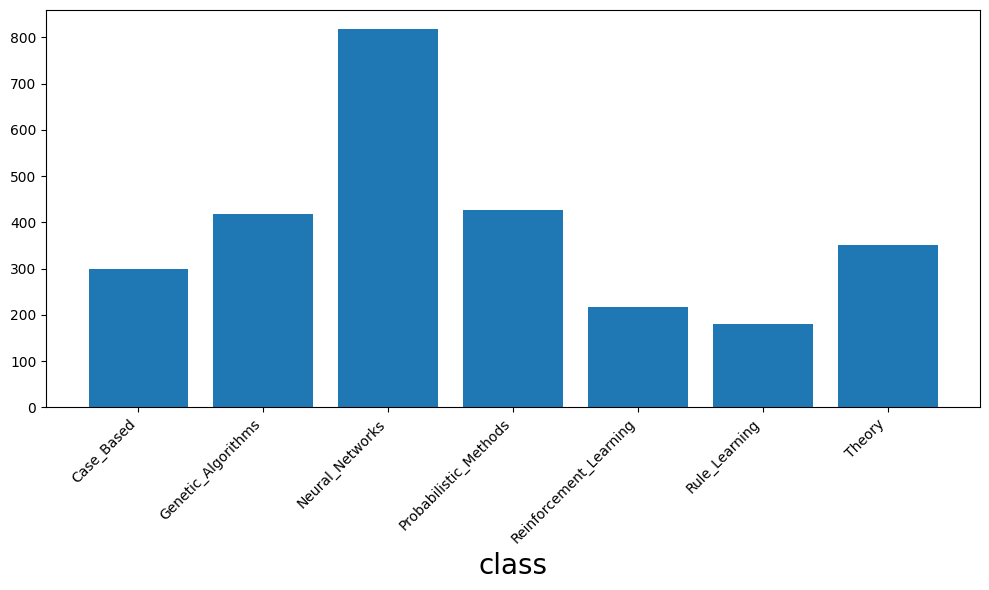

In [9]:
#Korzystając z metody unique biblioteki numpy możemy wyliczyć ile było unikalnych wystąpień - w tym wypadku naszych klas.
unique, counts = np.unique(data_np_y, return_counts=True)
counter = {}

#Za pomocą pętli możemy korzystając z słownika labels wpisać do kolejnego słownika liczbę wystąpienia danej klasy w grafie.
for key, value in zip(unique, counts):
  counter[labels[key]] = value

print(counter)
names = []

for name in sorted(counter.keys()):
  names.append(name)
count = [x[1] for x in sorted(counter.items())]
plt.figure(figsize=(10, 6))
plt.bar(range(7), count, tick_label=names)
plt.xlabel("class", size=20)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

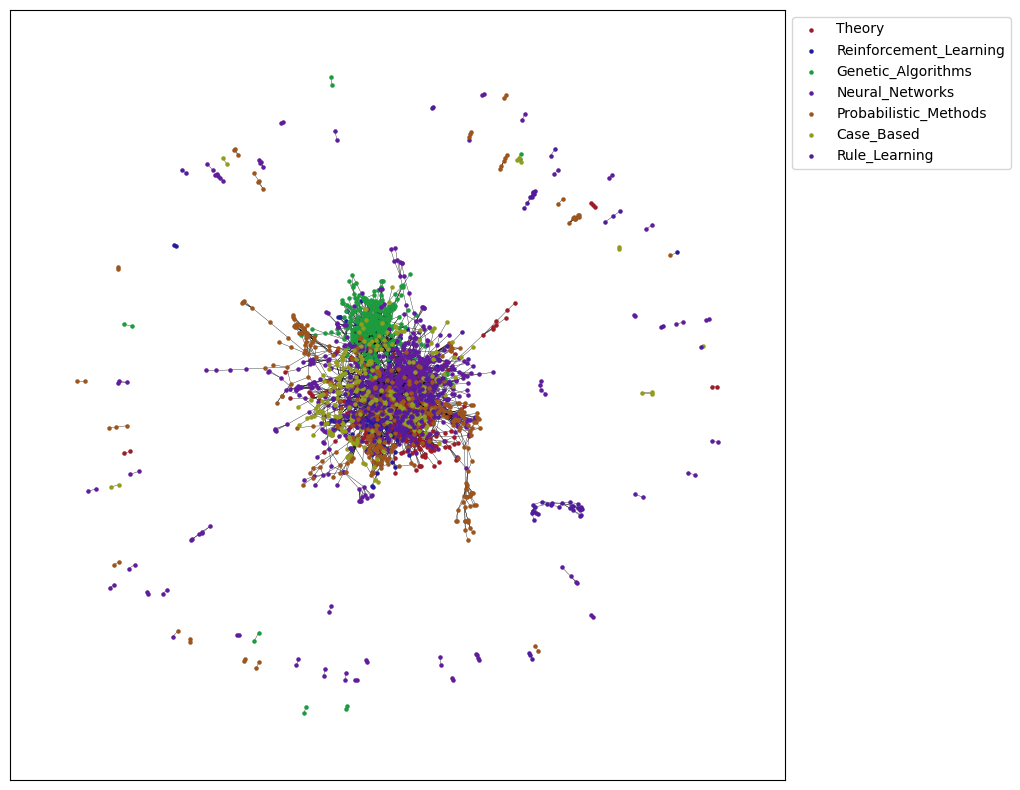

In [10]:
#Poniższa komórka zwiera prezentację graficzną grafu, w którym podzielone są węzły na kategorie publikacji do których przynależą. Obiekt node_list reprezentuje listę list, którego indeks głównej listy opisuje, jaki to rodzaj publikacji.
G = to_networkx(data, to_undirected=True)

node_list = [[], [], [], [], [], [], []]
color_list = ['#9c1c27', '#251c9c', '#1c9c3e', '#601c9c', '#9c551c', '#939c1c', '#511c9c']
#Iteracja po enumeracji obiektu data.y zwraca nam n-numer węzła i oraz i-kategorię węzła.
for n, i in enumerate(data.y):
    node_list[i].append(n)

pos = nx.spring_layout(G, seed = 42)
plt.figure(figsize = (10, 10))
label_list = list(labels.values())
#Osobna i jednoczesna iteracja po liście node_list oraz label_list umożliwia na grafie rysowanie węzłów tylko z danego rodzaju publikacji.
for num, i in enumerate(zip(node_list, label_list)):
    n, l = i[0], i[1]
    nx.draw_networkx_nodes(G, pos, nodelist=n, node_size = 5, node_color = color_list[num], label=l)

nx.draw_networkx_edges(G, pos, width = 0.25)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')

In [11]:
#Z
import heapq
degree_centrality = nx.degree_centrality(G)

largest_degrees = heapq.nlargest(10, degree_centrality, key=degree_centrality.get)
print(largest_degrees)

[1358, 306, 1701, 1986, 1810, 1623, 2034, 88, 1013, 598]


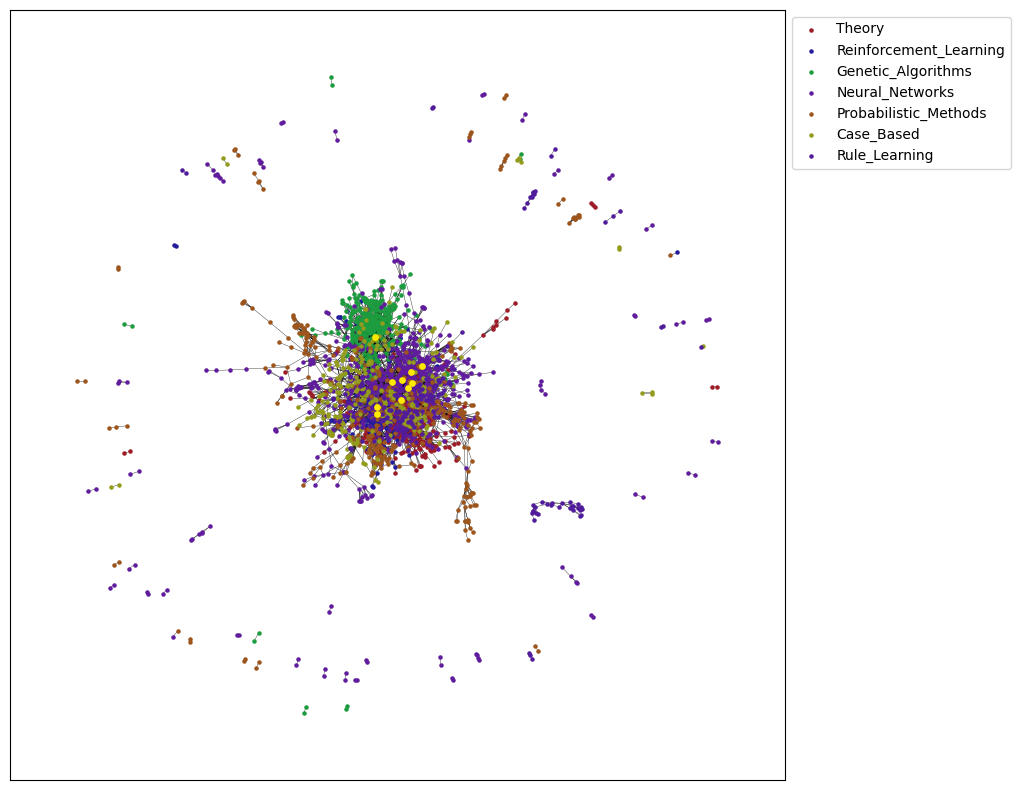

In [12]:
plt.figure(figsize = (10, 10))

for num, i in enumerate(zip(node_list, label_list)):
    n, l = i[0], i[1]
    nx.draw_networkx_nodes(G, pos, nodelist=n, node_size = 5, node_color = color_list[num], label=l)

nx.draw_networkx_nodes(G, pos, nodelist=largest_degrees, node_size = 15, node_color = '#ffea00')

nx.draw_networkx_edges(G, pos, width = 0.25)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')

In [13]:
largest_degrees_labels = {}

iter = 0
for category in node_list:
  for node in category:
    if node in largest_degrees:
      largest_degrees_labels[node]= labels[iter]
  iter+=1

print(largest_degrees_labels)

{88: 'Theory', 1013: 'Theory', 306: 'Reinforcement_Learning', 1623: 'Reinforcement_Learning', 1358: 'Genetic_Algorithms', 598: 'Neural_Networks', 1701: 'Neural_Networks', 1810: 'Neural_Networks', 1986: 'Neural_Networks', 2034: 'Probabilistic_Methods'}


In [14]:
labels_dict = {}

iter = 0

for category in node_list:
  for node in category:
    labels_dict[node]= iter
  iter+=1

print(labels_dict)

{3: 0, 6: 0, 10: 0, 11: 0, 32: 0, 35: 0, 52: 0, 60: 0, 61: 0, 62: 0, 65: 0, 74: 0, 79: 0, 80: 0, 81: 0, 88: 0, 94: 0, 95: 0, 98: 0, 100: 0, 142: 0, 146: 0, 149: 0, 161: 0, 164: 0, 186: 0, 195: 0, 204: 0, 211: 0, 214: 0, 239: 0, 242: 0, 257: 0, 260: 0, 270: 0, 274: 0, 276: 0, 279: 0, 280: 0, 292: 0, 304: 0, 305: 0, 315: 0, 323: 0, 324: 0, 334: 0, 347: 0, 354: 0, 365: 0, 373: 0, 405: 0, 408: 0, 415: 0, 423: 0, 434: 0, 437: 0, 440: 0, 446: 0, 456: 0, 461: 0, 467: 0, 475: 0, 478: 0, 485: 0, 496: 0, 497: 0, 502: 0, 525: 0, 527: 0, 530: 0, 531: 0, 543: 0, 544: 0, 572: 0, 586: 0, 591: 0, 606: 0, 614: 0, 619: 0, 624: 0, 636: 0, 642: 0, 651: 0, 659: 0, 666: 0, 667: 0, 679: 0, 680: 0, 693: 0, 707: 0, 711: 0, 717: 0, 718: 0, 725: 0, 730: 0, 731: 0, 733: 0, 734: 0, 736: 0, 738: 0, 751: 0, 753: 0, 763: 0, 767: 0, 769: 0, 771: 0, 777: 0, 794: 0, 809: 0, 815: 0, 838: 0, 839: 0, 842: 0, 851: 0, 852: 0, 858: 0, 861: 0, 863: 0, 873: 0, 880: 0, 888: 0, 895: 0, 897: 0, 901: 0, 917: 0, 948: 0, 964: 0, 965:

In [15]:
from networkx.algorithms import community

communities = list(community.greedy_modularity_communities(G))
print(len(communities))

106


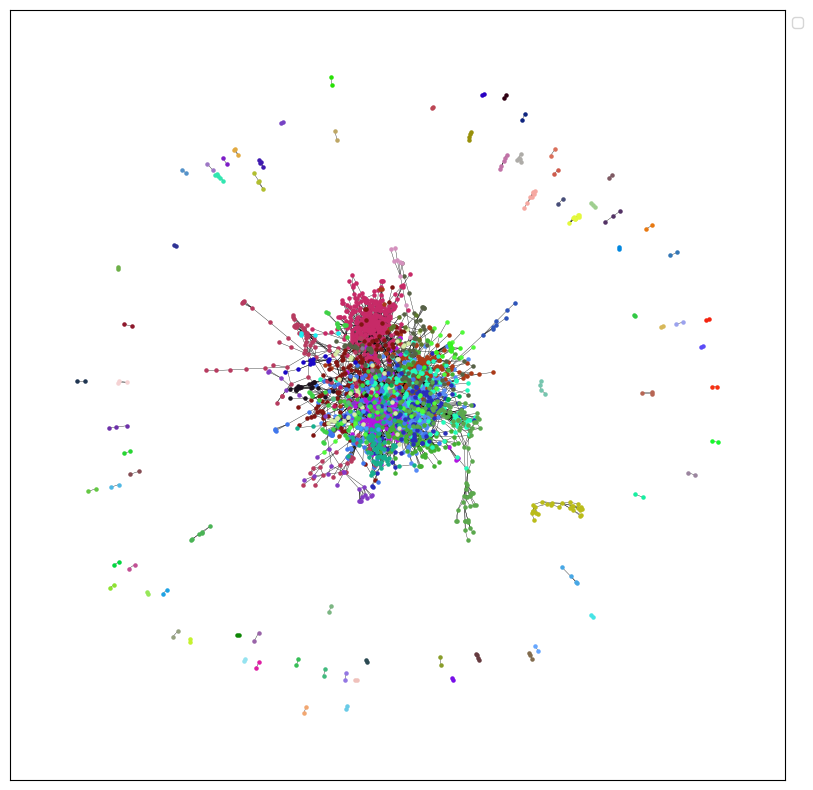

In [16]:
import random

plt.figure(figsize = (10, 10))

def verify_two_digit_hex(code: str) -> str:
  new_code = ''
  if len(code) < 4:
    new_code = '0'+code[2:]
  else:
    new_code = code[2:]
  return new_code

for community in list(communities):
    r = verify_two_digit_hex(hex(random.randrange(0, 2**8)))
    g = verify_two_digit_hex(hex(random.randrange(0, 2**8)))
    b = verify_two_digit_hex(hex(random.randrange(0, 2**8)))
    community_list = list(community)
    std_color = "#" + r+g+b
    nx.draw_networkx_nodes(G, pos, nodelist=community_list, node_size = 5, node_color = std_color)


nx.draw_networkx_edges(G, pos, width = 0.25)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')

In [17]:
number_of_edges = G.number_of_edges()
print(number_of_edges)

5278


In [18]:
data_edge_np = data.edge_index.numpy()
print(data_edge_np)

[[ 633 1862 2582 ...  598 1473 2706]
 [   0    0    0 ... 2707 2707 2707]]


In [19]:
print(data.edge_index.numpy())

[[ 633 1862 2582 ...  598 1473 2706]
 [   0    0    0 ... 2707 2707 2707]]


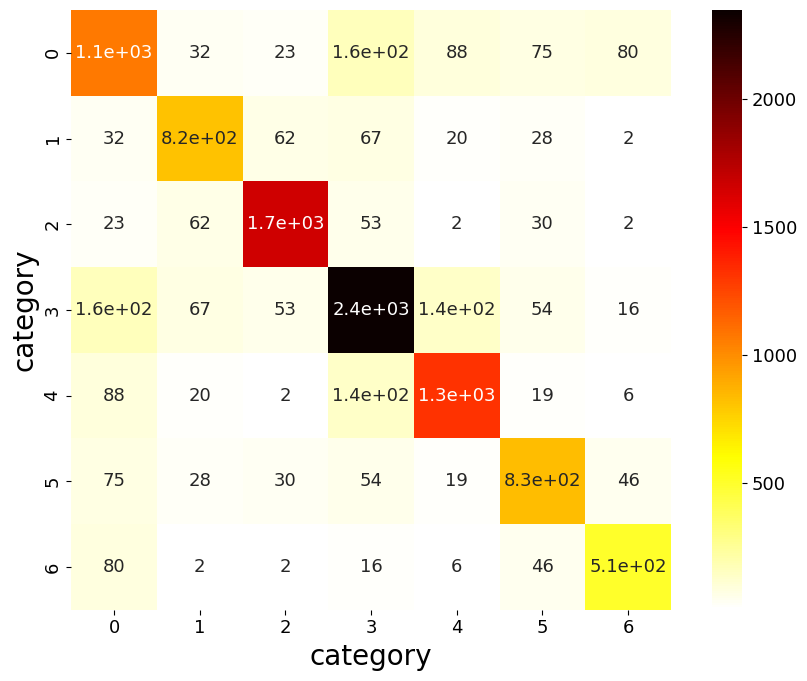

In [20]:
import seaborn as sns
#COO Format
connection_matrix = [
    [0,0,0,0,0,0,0],
     [0,0,0,0,0,0,0],
      [0,0,0,0,0,0,0],
       [0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0],
         [0,0,0,0,0,0,0],
          [0,0,0,0,0,0,0]
    ]

iter = 0
connected_labels_set = list(map(lambda x: data_np_y[x], data.edge_index.numpy()))
connected_labels_set = np.array(connected_labels_set)

for i in range(len(connected_labels_set[0])):
  node_label_A = connected_labels_set[0][i]
  node_label_B = connected_labels_set[1][i]
  connection_matrix[node_label_A][node_label_B]+=1

plt.figure(figsize=(9, 7))
plt.rcParams["font.size"] = 13
hm = sns.heatmap(connection_matrix, annot=True, cmap='hot_r', cbar=True, square=True)
plt.xlabel("category",size=20)
plt.ylabel("category",size=20)
plt.tight_layout()
plt.show()

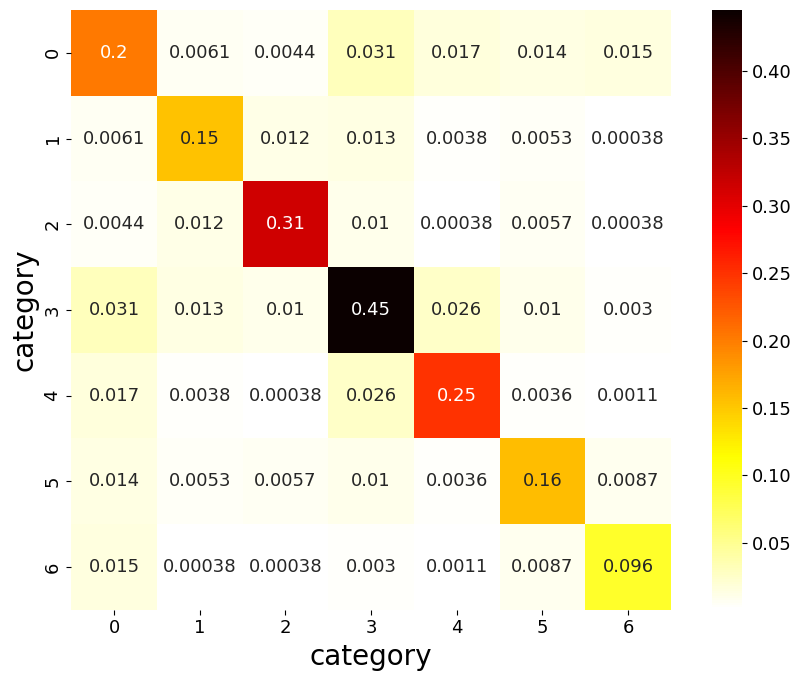

In [21]:
homophilly_array = np.array(connection_matrix)/number_of_edges

plt.figure(figsize=(9, 7))
plt.rcParams["font.size"] = 13
hm = sns.heatmap(homophilly_array, annot=True, cmap='hot_r', cbar=True, square=True)
plt.xlabel("category",size=20)
plt.ylabel("category",size=20)
plt.tight_layout()
plt.show()

In [22]:
!pip install tensorflow==2.11.0

In [23]:
!pip install git+https://github.com/VenkateshwaranB/stellargraph.git

  Cloning https://github.com/VenkateshwaranB/stellargraph.git to /tmp/pip-req-build-5vdsrmgc
  Running command git clone --filter=blob:none --quiet https://github.com/VenkateshwaranB/stellargraph.git /tmp/pip-req-build-5vdsrmgc
  Resolved https://github.com/VenkateshwaranB/stellargraph.git to commit efa1f847109a4ba490e7a5105646a20ee09a3243
  Preparing metadata (setup.py) ... done
  Created wheel for stellargraph: filename=stellargraph-1.3.0b0-py3-none-any.whl size=431845 sha256=090201017329b5c9208e1a7cd64ef6044524a487b33c3acbcab55a1be0fe85a5
  Stored in directory: /tmp/pip-ephem-wheel-cache-1p03qvd3/wheels/f3/06/0f/089f69af27d308a1830638f855b6c5755311d8ffc451de9980
Successfully built stellargraph


In [24]:
import stellargraph as sg
from stellargraph.mapper import FullBatchNodeGenerator
from stellargraph.layer import GCN

from tensorflow.keras import layers, optimizers, losses, metrics, Model
from sklearn import preprocessing, model_selection
from IPython.display import display, HTML
import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
dataset = sg.datasets.Cora()
display(HTML(dataset.description))
G, node_subjects = dataset.load()

In [26]:
print(G.info())

StellarGraph: Undirected multigraph
 Nodes: 2708, Edges: 5429

 Node types:
  paper: [2708]
    Features: float32 vector, length 1433
    Edge types: paper-cites->paper

 Edge types:
    paper-cites->paper: [5429]
        Weights: all 1 (default)
        Features: none


In [27]:
node_subjects.value_counts().to_frame()

,count
subject,
Neural_Networks,818
Probabilistic_Methods,426
Genetic_Algorithms,418
Theory,351
Case_Based,298
Reinforcement_Learning,217
Rule_Learning,180


In [28]:
train_subjects, test_subjects = model_selection.train_test_split(
    node_subjects, train_size=100, test_size=None, stratify=node_subjects
)
val_subjects, test_subjects = model_selection.train_test_split(
    test_subjects, train_size=500, test_size=None, stratify=test_subjects
)

In [29]:
train_subjects.value_counts().to_frame()

,count
subject,
Neural_Networks,30
Probabilistic_Methods,16
Genetic_Algorithms,15
Theory,13
Case_Based,11
Reinforcement_Learning,8
Rule_Learning,7


In [30]:
val_subjects.value_counts().to_frame()

,count
subject,
Neural_Networks,151
Probabilistic_Methods,79
Genetic_Algorithms,77
Theory,65
Case_Based,55
Reinforcement_Learning,40
Rule_Learning,33


In [32]:
from sklearn.preprocessing import LabelBinarizer

enc = LabelBinarizer()
train_targets = enc.fit_transform(train_subjects)
val_targets = enc.transform(val_subjects)
test_targets = enc.transform(test_subjects)

In [33]:
generator = FullBatchNodeGenerator(G, method="gcn")

Using GCN (local pooling) filters...


In [36]:
train_gen = generator.flow(train_subjects.index, train_targets)
gcn = GCN(
    layer_sizes=[16, 16], activations=["relu", "relu"], generator=generator, dropout=0.5
)
x_inp, x_out = gcn.in_out_tensors()
predictions = layers.Dense(units=train_targets.shape[1], activation="softmax")(x_out)

In [37]:
model = Model(inputs=x_inp, outputs=predictions)
model.compile(
    optimizer=optimizers.Adam(lr=0.01),
    loss=losses.categorical_crossentropy,
    metrics=["acc"],
)


val_gen = generator.flow(val_subjects.index, val_targets)

In [38]:
from tensorflow.keras.callbacks import EarlyStopping

es_callback = EarlyStopping(monitor="val_acc", patience=50, restore_best_weights=True)

In [39]:
history = model.fit(
    train_gen,
    epochs=200,
    validation_data=val_gen,
    verbose=2,
    shuffle=False,  # this should be False, since shuffling data means shuffling the whole graph
    callbacks=[es_callback],
)


Epoch 1/200
1/1 - 2s - loss: 1.9446 - acc: 0.1300 - val_loss: 1.9349 - val_acc: 0.2140 - 2s/epoch - 2s/step
Epoch 2/200
1/1 - 0s - loss: 1.9278 - acc: 0.2100 - val_loss: 1.9308 - val_acc: 0.2500 - 123ms/epoch - 123ms/step
Epoch 3/200
1/1 - 0s - loss: 1.9241 - acc: 0.2400 - val_loss: 1.9267 - val_acc: 0.2680 - 145ms/epoch - 145ms/step
Epoch 4/200
1/1 - 0s - loss: 1.9202 - acc: 0.3300 - val_loss: 1.9225 - val_acc: 0.2920 - 158ms/epoch - 158ms/step
Epoch 5/200
1/1 - 0s - loss: 1.9128 - acc: 0.3300 - val_loss: 1.9182 - val_acc: 0.3000 - 209ms/epoch - 209ms/step
Epoch 6/200
1/1 - 0s - loss: 1.9145 - acc: 0.2700 - val_loss: 1.9136 - val_acc: 0.3060 - 286ms/epoch - 286ms/step
Epoch 7/200
1/1 - 0s - loss: 1.8909 - acc: 0.3300 - val_loss: 1.9088 - val_acc: 0.3100 - 199ms/epoch - 199ms/step
Epoch 8/200
1/1 - 0s - loss: 1.8898 - acc: 0.3500 - val_loss: 1.9037 - val_acc: 0.3120 - 154ms/epoch - 154ms/step
Epoch 9/200
1/1 - 0s - loss: 1.8746 - acc: 0.3100 - val_loss: 1.8982 - val_acc: 0.3120 - 254ms

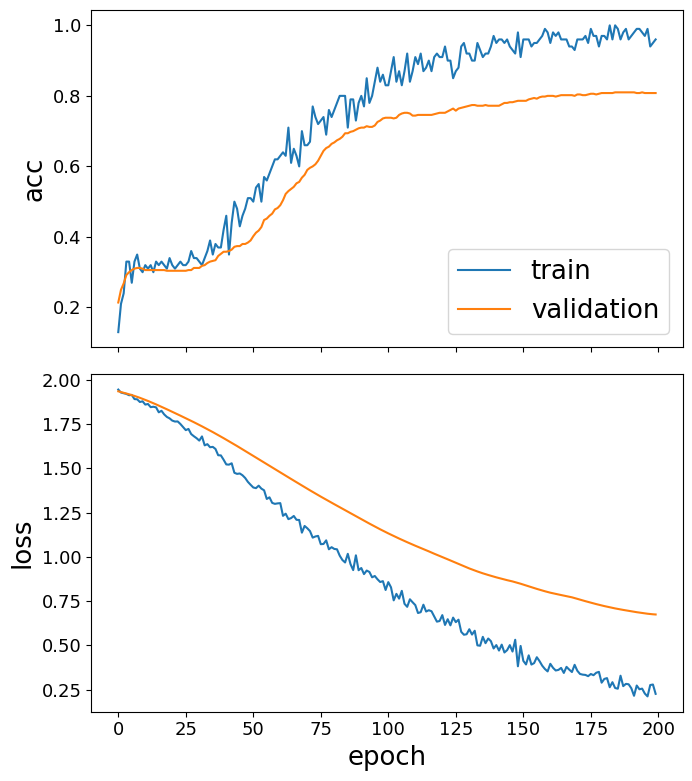

In [40]:
sg.utils.plot_history(history)

In [41]:
test_gen = generator.flow(test_subjects.index, test_targets)

In [42]:
test_metrics = model.evaluate(test_gen)
print("\nTest Set Metrics:")
for name, val in zip(model.metrics_names, test_metrics):
    print("\t{}: {:0.4f}".format(name, val))

1/1 [==============================] - 0s 77ms/step - loss: 0.7513 - acc: 0.7832

Test Set Metrics:
	loss: 0.7513
	acc: 0.7832


In [45]:
all_nodes = node_subjects.index
all_gen = generator.flow(all_nodes)
all_predictions = model.predict(all_gen)

1/1 [==============================] - 0s 193ms/step


In [46]:
node_predictions = enc.inverse_transform(all_predictions.squeeze())

In [48]:
import pandas as pd
df = pd.DataFrame({"Predicted": node_predictions, "True": node_subjects})
df.head(20)

,Predicted,True
31336,Probabilistic_Methods,Neural_Networks
1061127,Rule_Learning,Rule_Learning
1106406,Reinforcement_Learning,Reinforcement_Learning
13195,Reinforcement_Learning,Reinforcement_Learning
37879,Probabilistic_Methods,Probabilistic_Methods
1126012,Probabilistic_Methods,Probabilistic_Methods
1107140,Reinforcement_Learning,Theory
1102850,Probabilistic_Methods,Neural_Networks
31349,Probabilistic_Methods,Neural_Networks
1106418,Theory,Theory
